# Steps for implementation
#### Reading CSV
#### Data Description
#### Data Cleaning
#### Data Normalization
#### Features
#### Applying KNN and NB
#### Confusion Matrix

In [1]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split     # import module for train test split
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.loci import LOCI
from pyod.utils.data import evaluate_print

Using TensorFlow backend.


### Reading CSV

In [2]:
df1=pd.read_csv("./MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("./MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
#df3=pd.read_csv("../Datasets/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
#df4=pd.read_csv("../Datasets/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
#df5=pd.read_csv("../Datasets/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
#df6=pd.read_csv("../Datasets/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
#df7=pd.read_csv("../Datasets/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
#df8=pd.read_csv("../Datasets/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


In [3]:

df=pd.concat([df1,df2])
#df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [4]:
del df1,df2
#del df1,df2,df3,df4,df5,df6,df7,df8


In [5]:
# category A attacks
df_bot=df[df[' Label']=='Bot']
df_ddos=df[df[' Label']=='DDoS']
df_golden_eye=df[df[' Label']=='DoS GoldenEye']
df_hulk=df[df[' Label']=='DoS Hulk']
df_ssh_patator=df[df[' Label']=='SSH-Patator']
df_ftp_patator=df[df[' Label']=='FTP-Patator']
df_infiltration=df[df[' Label']=='Infiltration']

In [6]:
# benign data
df_benign=df[df[' Label']=='BENIGN']

In [7]:
df_cat_A=pd.concat([df_bot,df_ddos,df_golden_eye,df_hulk,df_ssh_patator,df_ftp_patator,df_infiltration, df_benign])
df_cat_A.groupby(' Label').first()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0


In [8]:
del df_bot,df_ddos,df_golden_eye,df_hulk,df_ssh_patator,df_ftp_patator,df_infiltration, df_benign

In [9]:
df=df_cat_A.copy()

In [10]:
del df_cat_A

In [11]:
df.groupby(' Label').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0


### Data Description

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353282 entries, 18883 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             353282 non-null  int64  
 1    Flow Duration                353282 non-null  int64  
 2    Total Fwd Packets            353282 non-null  int64  
 3    Total Backward Packets       353282 non-null  int64  
 4   Total Length of Fwd Packets   353282 non-null  int64  
 5    Total Length of Bwd Packets  353282 non-null  int64  
 6    Fwd Packet Length Max        353282 non-null  int64  
 7    Fwd Packet Length Min        353282 non-null  int64  
 8    Fwd Packet Length Mean       353282 non-null  float64
 9    Fwd Packet Length Std        353282 non-null  float64
 10  Bwd Packet Length Max         353282 non-null  int64  
 11   Bwd Packet Length Min        353282 non-null  int64  
 12   Bwd Packet Length Mean       353282 non

In [13]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,353282.000000,3.532820e+05,353282.000000,353282.000000,353282.000000,3.532820e+05,353282.000000,353282.000000,353282.000000,353282.000000,...,353282.000000,353282.000000,3.532820e+05,3.532820e+05,3.532820e+05,3.532820e+05,3.532820e+05,3.532820e+05,3.532820e+05,3.532820e+05
mean,8317.536203,1.470301e+07,5.473658,5.324557,789.085334,5.998437e+03,409.347516,25.766543,124.442551,157.246116,...,3.515919,22.886063,1.457166e+05,2.687304e+04,1.960644e+05,1.310762e+05,7.859771e+06,2.357610e+06,9.528822e+06,6.165548e+06
std,18974.050876,3.159391e+07,21.336977,30.756145,3091.009774,5.552206e+04,1526.654248,132.061381,412.573844,650.176230,...,16.529588,5.380668,7.644236e+05,2.895786e+05,9.742138e+05,7.354875e+05,1.929626e+07,1.039089e+07,2.328394e+07,1.762792e+07
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.367700e+04,2.000000,1.000000,26.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,4.694965e+05,3.000000,2.000000,44.000000,1.500000e+02,20.000000,6.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,6.696332e+06,5.000000,5.000000,86.000000,1.160100e+04,47.000000,31.000000,44.000000,10.263203,...,4.000000,20.000000,9.920000e+02,0.000000e+00,9.920000e+02,9.910000e+02,6.105852e+06,0.000000e+00,6.107426e+06,5.892240e+06
max,65532.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3867.000000,6692.644993,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


In [14]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

### Data Cleaning

In [15]:
#df2=df[df.columns[7:-1]]
#df2[' Label']=df[' Label']
#df=df2
#df2=[]
#del df2

In [16]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [17]:
len(df.columns)

79

In [18]:
df=df.dropna( axis=0, how='any')
df=df.replace(',,', np.nan, inplace=False)
df=df.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=False)

In [19]:
df.replace("Infinity", 0, inplace=True)
df['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
df[" Flow Packets/s"].replace("Infinity", 0, inplace=True)
df[" Flow Packets/s"].replace(np.nan, 0, inplace=True)
df['Flow Bytes/s'].replace(np.nan, 0,inplace=True)


df["Bwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df["Bwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)

df[" Bwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df[" Bwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df[" Bwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Bulk Rate"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(",,", 0, inplace=True)
df[" Fwd Avg Bulk Rate"].replace(np.nan, 0, inplace=True)


df[" Fwd Avg Packets/Bulk"].replace("Infinity", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(",,", 0, inplace=True)
df[" Fwd Avg Packets/Bulk"].replace(np.nan, 0, inplace=True)


df["Fwd Avg Bytes/Bulk"].replace("Infinity", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(",,", 0, inplace=True)
df["Fwd Avg Bytes/Bulk"].replace(np.nan, 0, inplace=True)


df[" CWE Flag Count"].replace("Infinity", 0, inplace=True)
df[" CWE Flag Count"].replace(",,", 0, inplace=True)
df[" CWE Flag Count"].replace(np.nan, 0, inplace=True)

df[" Bwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd URG Flags"].replace(",,", 0, inplace=True)
df[" Bwd URG Flags"].replace(np.nan, 0, inplace=True)

df[" Bwd PSH Flags"].replace("Infinity", 0, inplace=True)
df[" Bwd PSH Flags"].replace(",,", 0, inplace=True)
df[" Bwd PSH Flags"].replace(np.nan, 0, inplace=True)

df[" Fwd URG Flags"].replace("Infinity", 0, inplace=True)
df[" Fwd URG Flags"].replace(",,", 0, inplace=True)
df[" Fwd URG Flags"].replace(np.nan, 0, inplace=True)

In [20]:
df["Flow Bytes/s"]=df["Flow Bytes/s"].astype("float64")
df[' Flow Packets/s']=df[" Flow Packets/s"].astype("float64")

In [21]:
df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")

In [22]:
pd.set_option('display.max_rows', df.shape[0])

In [23]:
df.replace('Infinity',0.0, inplace=True)

In [24]:
df.replace('NaN',0.0, inplace=True)

In [25]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [26]:
df_benign=df[df[' Label']=='BENIGN']
df_benign.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [27]:
df_ddos=df[df[' Label']=='DDoS']
df_ddos.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
18883,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18884,80,4421382,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18885,80,1083538,3,6,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
18886,80,80034360,8,4,56,11601,20,0,7.000000,5.656854,...,20,939.0,0.0,939,939,39300000.0,44200000.0,70600000,8072664,DDoS
18887,80,642654,3,6,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


In [28]:


X=df_benign[df_benign.columns[0:-1]]
y=df_benign[df_benign.columns[-1]]

del df

### Data Normalization

In [29]:
from scipy import stats


In [30]:


cols = list(X.columns)
for col in cols:
    X[col] = stats.zscore(X[col])
    print(col)



/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 Destination Port
 Flow Duration
 Total Fwd Packets
 Total Backward Packets
Total Length of Fwd Packets
 Total Length of Bwd Packets
 Fwd Packet Length Max
 Fwd Packet Length Min
 Fwd Packet Length Mean
 Fwd Packet Length Std
Bwd Packet Length Max
 Bwd Packet Length Min
 Bwd Packet Length Mean
 Bwd Packet Length Std
Flow Bytes/s
 Flow Packets/s
 Flow IAT Mean
 Flow IAT Std
 Flow IAT Max
 Flow IAT Min
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Fwd IAT Min
Bwd IAT Total
 Bwd IAT Mean
 Bwd IAT Std
 Bwd IAT Max
 Bwd IAT Min
Fwd PSH Flags
 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Bwd Packets/s
 Min Packet Length
 Max Packet Length
 Packet Length Mean


/home/ebryx/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


 Packet Length Std
 Packet Length Variance
FIN Flag Count
 SYN Flag Count
 RST Flag Count
 PSH Flag Count
 ACK Flag Count
 URG Flag Count
 CWE Flag Count
 ECE Flag Count
 Down/Up Ratio
 Average Packet Size
 Avg Fwd Segment Size
 Avg Bwd Segment Size
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate
Subflow Fwd Packets
 Subflow Fwd Bytes
 Subflow Bwd Packets
 Subflow Bwd Bytes
Init_Win_bytes_forward
 Init_Win_bytes_backward
 act_data_pkt_fwd
 min_seg_size_forward
Active Mean
 Active Std
 Active Max
 Active Min
Idle Mean
 Idle Std
 Idle Max
 Idle Min


In [31]:
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.864799,-0.421474,-0.151613,-0.169201,-0.317394,-0.075181,-0.334656,-0.20243,-0.366483,-0.303627,...,-0.127972,-0.734378,-0.152339,-0.116509,-0.181213,-0.130066,-0.343143,-0.159248,-0.341465,-0.310434
1,1.873217,-0.421471,-0.189113,-0.143173,-0.318971,-0.075095,-0.334656,-0.20243,-0.366483,-0.303627,...,-0.176358,-0.734378,-0.152339,-0.116509,-0.181213,-0.130066,-0.343143,-0.159248,-0.341465,-0.310434
2,1.873261,-0.421473,-0.189113,-0.143173,-0.318971,-0.075095,-0.334656,-0.20243,-0.366483,-0.303627,...,-0.176358,-0.734378,-0.152339,-0.116509,-0.181213,-0.130066,-0.343143,-0.159248,-0.341465,-0.310434
3,1.480466,-0.421473,-0.189113,-0.143173,-0.318971,-0.075095,-0.334656,-0.20243,-0.366483,-0.303627,...,-0.176358,-0.734378,-0.152339,-0.116509,-0.181213,-0.130066,-0.343143,-0.159248,-0.341465,-0.310434
4,1.864710,-0.421474,-0.151613,-0.169201,-0.317394,-0.075181,-0.334656,-0.20243,-0.366483,-0.303627,...,-0.127972,-0.734378,-0.152339,-0.116509,-0.181213,-0.130066,-0.343143,-0.159248,-0.341465,-0.310434


### Feature Selection

In [32]:
# features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets']
# features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,' Flow Duration',  " Total Length of Bwd Packets",  " Flow IAT Mean",   " Flow IAT Max"]
features=[" Flow IAT Std"," Fwd Packet Length Std" ,' Flow Duration']

In [33]:
X=X[features].copy()
X.head()

,Flow IAT Std,Fwd Packet Length Std,Flow Duration
0,-0.353944,-0.303627,-0.421474
1,-0.353944,-0.303627,-0.421471
2,-0.353944,-0.303627,-0.421473
3,-0.353944,-0.303627,-0.421473
4,-0.353944,-0.303627,-0.421474


In [34]:
len(X.columns)

3

### Applying Algorithms

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from loci.loci import run_loci

In [37]:
loci_res = run_loci(X_train)
outlier_indices = loci_res.outlier_indices

MemoryError: Unable to allocate 121. GiB for an array with shape (16233767578,) and data type float64

In [38]:
loci_res = run_loci(X_train[:800])
outlier_indices = loci_res.outlier_indices

KeyboardInterrupt: 

#### PYOD

#### LOCI

In [39]:
t1 = time.time()
from pyod.models.loci import LOCI
clf = LOCI()
clf.fit(X_train[:800])

t2 = time.time()


In [40]:
print("time : ", (t2-t1)/60, "minutes")

time :  20.8574965039889 minutes


In [41]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)


MemoryError: Unable to allocate 15.1 GiB for an array with shape (45048, 45048) and data type float64

In [42]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test[:300])  # outlier labels (0 or 1)


In [43]:
print("Total Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))

Total Samples :  300
Inliers :  160
Outliers :  140


In [51]:
np.argmin(X_test[:300])

50

In [52]:
np.argmax(X_test[:300])

826

In [60]:
iat = X_test[:300][" Flow IAT Std"]
length = X_test[:300][" Fwd Packet Length Std"]
duration = X_test[:300][' Flow Duration']


In [71]:
inliers = []
outliers = []
i = 0
for j in y_test_pred:
    if j == 0:
        inliers.append(i)
    else:
        outliers.append(i)
    i = i+1

In [72]:
inliers

[2,
 3,
 4,
 5,
 7,
 10,
 11,
 14,
 15,
 18,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 35,
 36,
 38,
 41,
 42,
 44,
 45,
 46,
 50,
 51,
 52,
 53,
 56,
 60,
 61,
 63,
 66,
 70,
 71,
 72,
 73,
 74,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 88,
 92,
 95,
 96,
 98,
 100,
 101,
 104,
 105,
 108,
 110,
 113,
 117,
 121,
 123,
 126,
 127,
 131,
 132,
 134,
 135,
 136,
 138,
 140,
 143,
 145,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 176,
 177,
 183,
 184,
 186,
 189,
 192,
 195,
 196,
 197,
 198,
 199,
 202,
 203,
 204,
 207,
 210,
 214,
 216,
 218,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 234,
 236,
 237,
 239,
 241,
 248,
 249,
 250,
 251,
 253,
 255,
 256,
 259,
 260,
 261,
 262,
 263,
 266,
 267,
 269,
 270,
 273,
 276,
 277,
 281,
 284,
 287,
 289,
 290,
 293,
 295,
 298,
 299]

In [73]:
outliers

[0,
 1,
 6,
 8,
 9,
 12,
 13,
 16,
 17,
 19,
 21,
 23,
 27,
 29,
 31,
 33,
 34,
 37,
 39,
 40,
 43,
 47,
 48,
 49,
 54,
 55,
 57,
 58,
 59,
 62,
 64,
 65,
 67,
 68,
 69,
 75,
 76,
 80,
 86,
 87,
 89,
 90,
 91,
 93,
 94,
 97,
 99,
 102,
 103,
 106,
 107,
 109,
 111,
 112,
 114,
 115,
 116,
 118,
 119,
 120,
 122,
 124,
 125,
 128,
 129,
 130,
 133,
 137,
 139,
 141,
 142,
 144,
 146,
 148,
 155,
 156,
 157,
 162,
 173,
 174,
 175,
 178,
 179,
 180,
 181,
 182,
 185,
 187,
 188,
 190,
 191,
 193,
 194,
 200,
 201,
 205,
 206,
 208,
 209,
 211,
 212,
 213,
 215,
 217,
 224,
 232,
 233,
 235,
 238,
 240,
 242,
 243,
 244,
 245,
 246,
 247,
 252,
 254,
 257,
 258,
 264,
 265,
 268,
 271,
 272,
 274,
 275,
 278,
 279,
 280,
 282,
 283,
 285,
 286,
 288,
 291,
 292,
 294,
 296,
 297]

In [108]:
iat_array_inliers = []
iat_array_outliers = []

i = 0
for key,value in enumerate(iat):
    if i in inliers:
        iat_array_inliers.append(value)
        iat_array_outliers.append(1000)
    else:
        iat_array_inliers.append(1000)
        iat_array_outliers.append(value)
    i = i+1

In [109]:
iat_array_inliers

[1000,
 1000,
 -0.35394428439656045,
 -0.35394428439656045,
 -0.3539293196229632,
 -0.35394428439656045,
 1000,
 -0.35394428439656045,
 1000,
 1000,
 -0.35394428439656045,
 -0.3539284725603072,
 1000,
 1000,
 0.09444117471746631,
 -0.3516303627450359,
 1000,
 1000,
 -0.35394428439656045,
 1000,
 -0.353927201771868,
 1000,
 -0.35394428439656045,
 1000,
 -0.351704180142027,
 -0.35394428439656045,
 -0.35394428439656045,
 1000,
 -0.35394428439656045,
 1000,
 0.13303139063135053,
 1000,
 0.15763149059846396,
 1000,
 1000,
 -0.35394428439656045,
 -0.35103970654714967,
 1000,
 -0.35394428439656045,
 1000,
 1000,
 -0.35392864804468877,
 -0.35394428439656045,
 1000,
 0.18880503286129474,
 -0.35394428439656045,
 -0.35393475055631723,
 1000,
 1000,
 1000,
 -0.08827690514814858,
 -0.35394428439656045,
 -0.35392974292585183,
 -0.3539263021787212,
 1000,
 1000,
 -0.35394428439656045,
 1000,
 1000,
 1000,
 -0.35394428439656045,
 -0.3517295560091354,
 1000,
 -0.35394428439656045,
 1000,
 1000,
 -0.353

In [110]:
iat_array_outliers

[0.5245633903165974,
 -0.35394428439656045,
 1000,
 1000,
 1000,
 1000,
 -0.35394428439656045,
 1000,
 -0.35394428439656045,
 -0.35386255752191303,
 1000,
 1000,
 -0.3538488403172936,
 -0.33596946442836345,
 1000,
 1000,
 -0.35394428439656045,
 0.2799590120481155,
 1000,
 1.9609011518441695,
 1000,
 3.8355999206306763,
 1000,
 0.45474052158356415,
 1000,
 1000,
 1000,
 -0.35381806305984387,
 1000,
 -0.3539211313506206,
 1000,
 -0.34681640884397846,
 1000,
 -0.35387166390147107,
 -0.3519603684259759,
 1000,
 1000,
 -0.35192756676130205,
 1000,
 0.2940812194331524,
 -0.1504351555052798,
 1000,
 1000,
 2.8248927583283856,
 1000,
 1000,
 1000,
 -0.35394428439656045,
 -0.3493784885871543,
 2.97160831414646,
 1000,
 1000,
 1000,
 1000,
 -0.35394428439656045,
 3.069418684691843,
 1000,
 2.8085910299041554,
 -0.35392000193373396,
 -0.35394428439656045,
 1000,
 1000,
 -0.3522348172279537,
 1000,
 0.37281892864245303,
 3.3791515247522224,
 1000,
 -0.35143784043108217,
 -0.35394428439656045,
 0.2

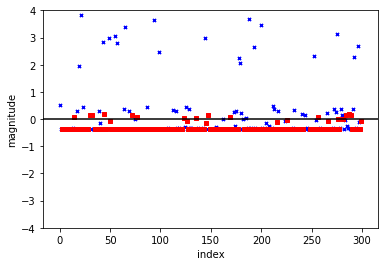

In [118]:
import matplotlib.pyplot as plt
y = np.arange(300)
plt.scatter(y,iat_array_outliers, s = 10, c='b', marker='x', label='1')
plt.scatter(y,iat_array_inliers,  s = 10, c='r', marker='s', label='-1')
plt.xlabel('index')
plt.ylabel('magnitude')
plt.axhline(0, color='black')
plt.ylim(-4, 4)
plt.show()

In [112]:
len(X_test[:300])

300

In [113]:
length_array_inliers = []
length_array_outliers = []

i = 0
for key,value in enumerate(length):
    if i in inliers:
        length_array_inliers.append(value)
        length_array_outliers.append(1000)

    else:
        length_array_outliers.append(value)
        
        length_array_inliers.append(1000)
    i = i+1
    


In [114]:
len(length_array_inliers)

300

In [115]:
len(length_array_outliers)

300

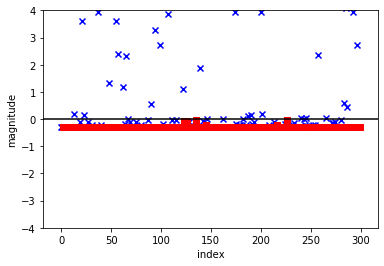

In [116]:
import matplotlib.pyplot as plt
y = np.arange(300)
plt.scatter(y,length_array_outliers, c='b', marker='x', label='1')
plt.scatter(y,length_array_inliers,  c='r', marker='s', label='-1')
plt.xlabel('index')
plt.ylabel('magnitude')
plt.axhline(0, color='black')
plt.ylim(-4, 4)
plt.show()

In [119]:
duration_array_inliers = []
duration_array_outliers = []

i = 0
for key,value in enumerate(duration):
    if i in inliers:
        duration_array_inliers.append(value)
        duration_array_outliers.append(1000)

    else:
        duration_array_outliers.append(value)
        
        duration_array_inliers.append(1000)
    i = i+1
    


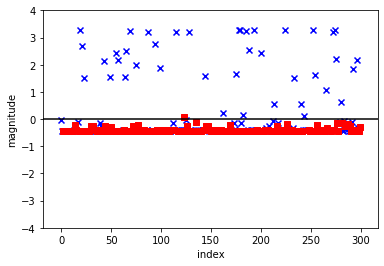

In [120]:
import matplotlib.pyplot as plt
y = np.arange(300)
plt.scatter(y,duration_array_outliers, s = 10,c='b', marker='x', label='1')
plt.scatter(y,duration_array_inliers,  s = 10,c='r', marker='s', label='-1')
plt.xlabel('index')
plt.ylabel('magnitude')
plt.axhline(0, color='black')
plt.ylim(-4, 4)
plt.show()